In [1]:
#!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("../Csv/Exported_queries/Max_numero_partecipanti_evento_per_Paese.csv")
df.head()

FileNotFoundError: [Errno 2] File b'../Csv/Exported_queries/Max_numero_partecipanti_evento_per_Paese.csv' does not exist: b'../Csv/Exported_queries/Max_numero_partecipanti_evento_per_Paese.csv'

In [3]:
# create rando data distrib
#x = np.random.rand(len(df))
x=[]
for it in range(13):
    for i in range(10):
        x.append(i)
for i in range(4):
        x.append(i)        
#print(len(x))
y=[]
for i in range(13):
    app=[i]*10
    for elem in app:
        y.append(elem)
app=[13]*4
for elem in app:
    y.append(elem)
a=np.array(x)
a=a/10
#print(x)
#print(y)
#y = np.random.rand(len(df))
#print(len(y))
#z = np.random.rand(len(df))
z=df['max_part']

x1 = np.random.rand(len(df))*100

y1 = np.random.rand(len(df))*100
#print(len(y1))
#z = np.random.rand(len(df))
z1=z[:30]
#print(len(z1))
df['x']=x
df['y']=y
df1=df.head(20)
df1

NameError: name 'df' is not defined

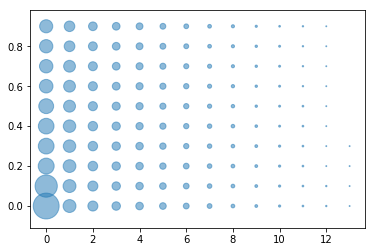

In [4]:
plt.scatter(y, a, s=z, alpha=0.5)
plt.show()

In [5]:
#seaborn.violinplot(ax=ax, data=df, **violin_options)

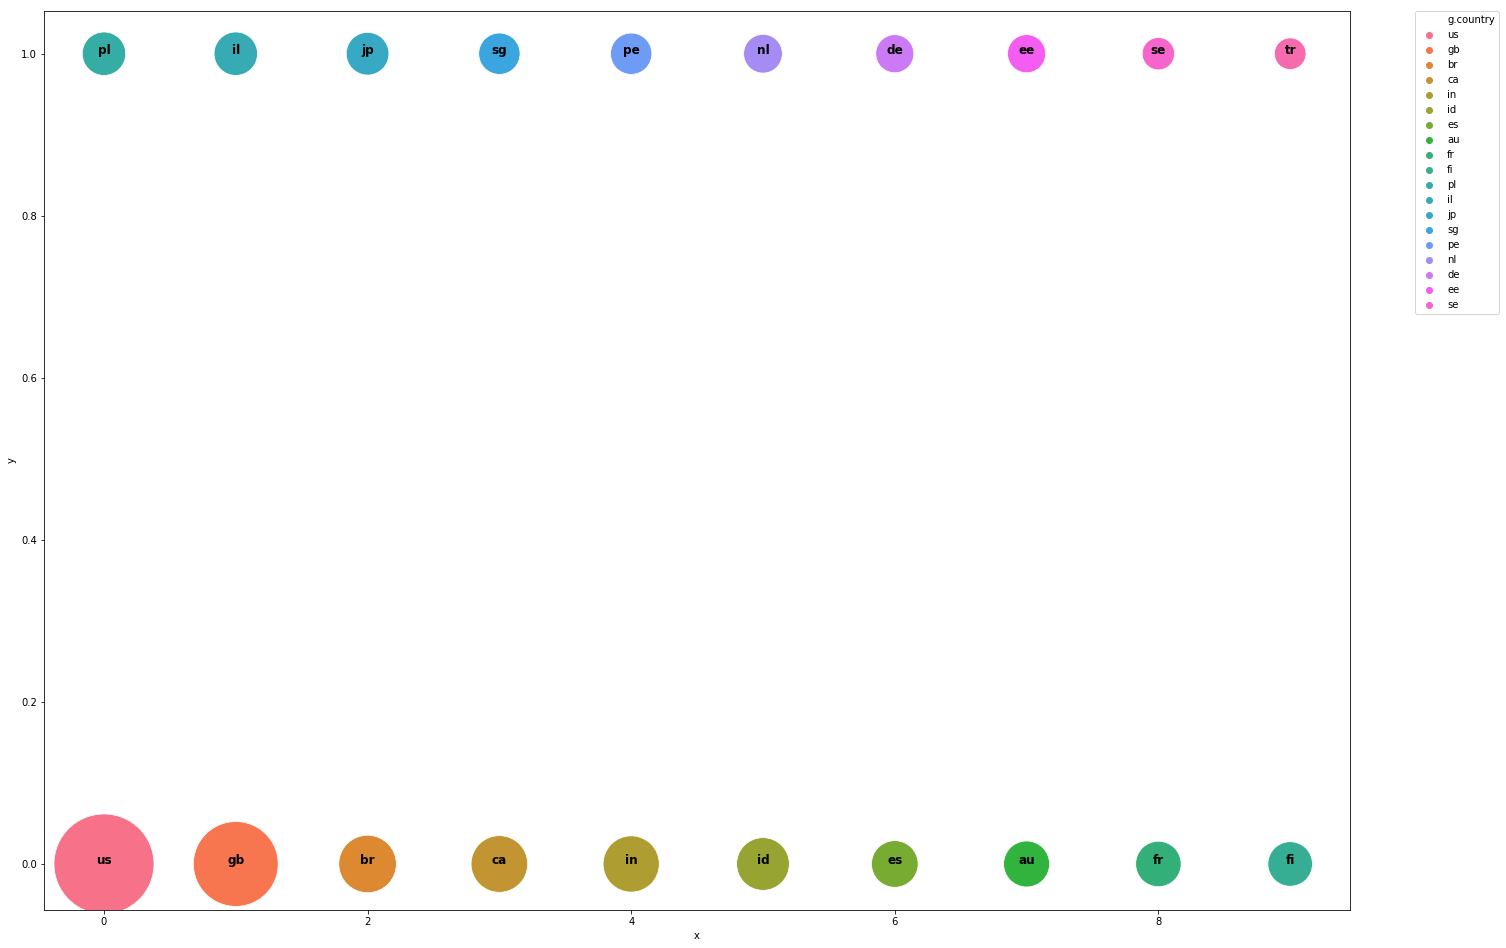

In [6]:
#df1['max_part1']=df1['max_part'].apply(lambda x: x*10000)
#print(df1.head())
#sns.set(rc={'figure.figsize':(11.7,8.27)})
a4_dims = (11.7*2, 8.27*2)
fig, ax = plt.subplots(figsize=a4_dims)

plot=sns.scatterplot('x', 'y', ax=ax,data=df1,  size='max_part',sizes=(1000,10000), hue='g.country')
for line in range(len(df1)):
     ax.text(df1['x'][line], df1['y'][line],df1['g.country'][line], horizontalalignment='center', size='large', color='black', weight='semibold')
handles, labels = ax.get_legend_handles_labels()

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles[:len(df1)], labels=labels[:len(df1)])
plt.show()
fig=plot.get_figure()
fig.savefig('sns.png')

In [127]:
#cmap = plt.cm.afmhot
#cmap = plt.cm.Pastel1
#cmap=plt.cm.Accent
#cmap=plt.cm.Paired
#cmap=plt.cm.tab20c
cmap=plt.cm.tab20

norm = matplotlib.colors.Normalize(vmin=0, vmax=len(df1)) 

In [63]:
class C():
    def __init__(self,r, iterations):
        self.N = len(r)
        self.iterat=iterations
        self.x = np.ones((self.N,3))
        self.x[:,2] = r
        maxstep = 2*self.x[:,2].max()
        length = np.ceil(np.sqrt(self.N))
        grid = np.arange(0,length*maxstep,maxstep)
        gx,gy = np.meshgrid(grid,grid)
        self.x[:,0] = gx.flatten()[:self.N]
        self.x[:,1] = gy.flatten()[:self.N]
        self.x[:,:2] = self.x[:,:2] - np.mean(self.x[:,:2], axis=0)

        self.step = self.x[:,2].min()
        self.p = lambda x,y: np.sum((x**2+y**2)**2)
        self.E = self.energy()
        self.iter = 1.

    def minimize(self):
        while self.iter < self.iterat*self.N:
            for i in range(self.N):
                rand = np.random.randn(2)*self.step/self.iter
                self.x[i,:2] += rand
                e = self.energy()
                if (e < self.E and self.isvalid(i)):
                    self.E = e
                    self.iter = 1.
                else:
                    self.x[i,:2] -= rand
                    self.iter += 1.

    def energy(self):
        return self.p(self.x[:,0], self.x[:,1])

    def distance(self,x1,x2):
        return np.sqrt((x1[0]-x2[0])**2+(x1[1]-x2[1])**2)-x1[2]-x2[2]

    def isvalid(self, i):
        for j in range(self.N):
            if i!=j: 
                if self.distance(self.x[i,:], self.x[j,:]) < 0:
                    return False
        return True

    def plot(self, ax):
        image = plt.imread("image_demo_clip_path.png")
        for i in range(self.N):
            circ = plt.Circle(self.x[i,:2],self.x[i,2], color=cmap(norm(i)) )
            #circ = patches.Circle(self.x[i,:2],self.x[i,2],transform=ax.transData) #, color=cmap(norm(i)) )
            ax.add_patch(circ)
            label = ax.annotate(df1['g.country'][i], xy=(self.x[i,0],self.x[i,1]), fontsize=20, ha="center")

In [64]:
c = C(df1.max_part, 100)

In [4]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=a4_dims,subplot_kw=dict(aspect="equal"))
image = plt.imread("index.jpeg")

ax.axis("off")


c.minimize()

c.plot(ax)
patch = patches.Circle((110, 110), radius=110, transform=ax.transData)
#ax.add_patch(patch)

im = ax.imshow(image, zorder=40)

im.set_clip_path(patch)

ax.relim()
ax.autoscale_view()

plt.show()

NameError: name 'a4_dims' is not defined